In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pathlib 

In [39]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [ ]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(0, 190))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

In [ ]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

In [ ]:
count_row = X.shape[0]
count_row

In [ ]:
q = np.linspace(0, 190, 191)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
for i in range(count_row):
    plt.plot(q, X.iloc[i])

In [8]:
from ase.io import read
from ase.spacegroup import crystal

In [22]:

filename1 = r"C:\Python\Projects\crystal-phase-prediction\crystal_data\CIFs\Ag_HfO2_cat_3.125_222_o.cif"
s = read(filename1)

In [10]:
from ase.utils.xrdebye import wavelengths


In [32]:
from ase.utils.xrdebye import XrDebye
xrd = XrDebye(atoms=s, wavelength=wavelengths['CuKa1'])

<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get

<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get_atomic> Element Hf not available
<xrdebye::get

<AxesSubplot:xlabel='2$\\theta$', ylabel='Intensity'>

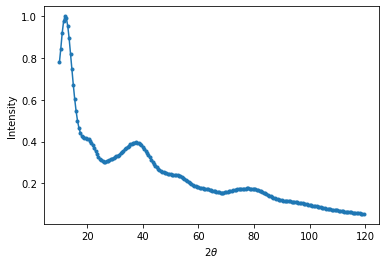

In [33]:
xrd.calc_pattern(x=np.arange(10,120,0.5), mode='XRD')
xrd.plot_pattern()

In [34]:
arr = np.load(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\diffsim_hfo2.pkl.npy')
arr

array([[0.00129086, 0.00134928, 0.00130477, ..., 0.28338931, 0.18062312,
        0.08780983],
       [0.00087473, 0.0008902 , 0.00091099, ..., 0.19928036, 0.10261313,
        0.05594443],
       [0.00049773, 0.0005025 , 0.00050909, ..., 0.01357318, 0.01087214,
        0.00679981],
       ...,
       [0.00144282, 0.00145388, 0.00146911, ..., 0.31742505, 0.20117378,
        0.12105431],
       [0.00077438, 0.00077656, 0.00078034, ..., 0.02353559, 0.01592645,
        0.01071918],
       [0.00037948, 0.00037907, 0.00037942, ..., 0.00540994, 0.00411303,
        0.00278402]])

In [36]:
df = pd.DataFrame(arr)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,...,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.000917,0.000921,0.000922,0.000930,0.000954,0.000997,0.001045,0.001074,0.001076,0.001073,...,0.139210,0.135526,0.141161,0.149890,0.154502,0.151406,0.140812,0.123893,0.099926,0.069941
std,0.000421,0.000417,0.000397,0.000392,0.000410,0.000463,0.000519,0.000508,0.000468,0.000455,...,0.133205,0.131114,0.137896,0.143563,0.142335,0.136505,0.129227,0.118381,0.102362,0.077142
min,0.000295,0.000294,0.000294,0.000295,0.000295,0.000296,0.000298,0.000299,0.000301,0.000304,...,0.001942,0.001860,0.001794,0.001729,0.001672,0.001616,0.001564,0.001509,0.001438,0.001356
25%,0.000534,0.000538,0.000543,0.000555,0.000567,0.000590,0.000622,0.000651,0.000663,0.000660,...,0.011888,0.011202,0.011330,0.012468,0.013518,0.014702,0.014975,0.014108,0.011868,0.008444
50%,0.000928,0.000946,0.000960,0.000981,0.001011,0.001054,0.001093,0.001125,0.001146,0.001142,...,0.109257,0.105458,0.102513,0.118158,0.130666,0.142334,0.122799,0.093341,0.065914,0.047406
75%,0.001174,0.001186,0.001195,0.001219,0.001243,0.001275,0.001310,0.001348,0.001372,0.001395,...,0.242877,0.225844,0.234338,0.254853,0.257985,0.238998,0.232165,0.208148,0.163927,0.106650
max,0.003790,0.003717,0.002738,0.002389,0.002881,0.004007,0.004878,0.004513,0.003315,0.003137,...,0.764510,0.787974,0.778862,0.768100,0.763723,0.721897,0.895321,1.000000,0.812963,0.751425


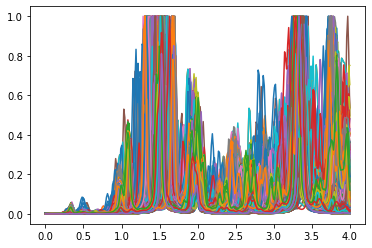

In [37]:
q = np.linspace(0, 4, 300)
for i in range(count_row):
    plt.plot(q, df.iloc[i])